###  Libraries

In [168]:
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report # recall,precision,f1_score,c_m
from sklearn.metrics import confusion_matrix
from nltk.tokenize import RegexpTokenizer 
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline 

from PIL import Image 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import pickle

import warnings
warnings.filterwarnings('ignore')

* **Load the dataset**

In [169]:
phish_data = pd.read_csv('phishing_site_urls.csv')

In [170]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [171]:
phish_data.tail()

,URL,Label
549346,23.227.196.215/,bad
549347,apple-checker.org/,bad
549348,apple-iclods.org/,bad
549349,apple-uptoday.org/,bad
549350,apple-search.info,bad


In [172]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549351 entries, 0 to 549350
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549351 non-null  object
 1   Label   549351 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [173]:
phish_data.isnull().sum()

URL      0
Label    0
dtype: int64

### Preprocessing

In [174]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
#http://example.com   ->        ["http", "example", "com"]

In [175]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [176]:
tokenizer.tokenize(phish_data.URL[0]) 

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [177]:
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) 

In [178]:
phish_data.sample(5)

,URL,Label,text_tokenized
172101,en.wikipedia.org/wiki/C.D._Howe_Institute,good,"[en, wikipedia, org, wiki, C, D, Howe, Institute]"
264633,123people.com/z/leoni+carlo,good,"[people, com, z, leoni, carlo]"
73210,www.chilkatsoft.com/cpp_libraries.asp,good,"[www, chilkatsoft, com, cpp, libraries, asp]"
512154,itoadnqgpbi.click/information.cgi,bad,"[itoadnqgpbi, click, information, cgi]"
216769,mp3skull.com/mp3/dino_bravo.html,good,"[mp, skull, com, mp, dino, bravo, html]"


In [179]:
stemmer = SnowballStemmer("english")

In [180]:
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

In [181]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
49971,galvaneks.tripod.com/index.html/,good,"[galvaneks, tripod, com, index, html]","[galvanek, tripod, com, index, html]"
175937,en.wikipedia.org/wiki/Jacques_Leduc,good,"[en, wikipedia, org, wiki, Jacques, Leduc]","[en, wikipedia, org, wiki, jacqu, leduc]"
378555,livestrong.com/thedailyplate/nutrition-calorie...,good,"[livestrong, com, thedailyplate, nutrition, ca...","[livestrong, com, thedailypl, nutrit, calori, ..."
258755,wiki.answers.com/Q/What_is_Earl_Hines_nickname,good,"[wiki, answers, com, Q, What, is, Earl, Hines,...","[wiki, answer, com, q, what, is, earl, hine, n..."
415865,pornhub.com/view_video.php?viewkey=651dadac5ea...,good,"[pornhub, com, view, video, php, viewkey, dada...","[pornhub, com, view, video, php, viewkey, dada..."


In [182]:
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))

In [183]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
244903,swstruckbodiesandtrailers.com/index.php?pageId=21,good,"[swstruckbodiesandtrailers, com, index, php, p...","[swstruckbodiesandtrail, com, index, php, pageid]",swstruckbodiesandtrail com index php pageid
67428,tools.ietf.org/html/rfc1466,good,"[tools, ietf, org, html, rfc]","[tool, ietf, org, html, rfc]",tool ietf org html rfc
376545,linkedin.com/pub/dir/donald/mcintosh,good,"[linkedin, com, pub, dir, donald, mcintosh]","[linkedin, com, pub, dir, donald, mcintosh]",linkedin com pub dir donald mcintosh
293297,blu-ray.com/movies/Topsy-Turvy-Blu-ray/18902/,good,"[blu, ray, com, movies, Topsy, Turvy, Blu, ray]","[blu, ray, com, movi, topsi, turvi, blu, ray]",blu ray com movi topsi turvi blu ray
266002,5min.com/Video/Dramatic-Reads-Chris-Roberson-5...,good,"[min, com, Video, Dramatic, Reads, Chris, Robe...","[min, com, video, dramat, read, chris, roberson]",min com video dramat read chris roberson


### Visualization 

In [184]:
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [185]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [186]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\r\nÓ...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


Function to visualize the important keys from url 

In [187]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [188]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

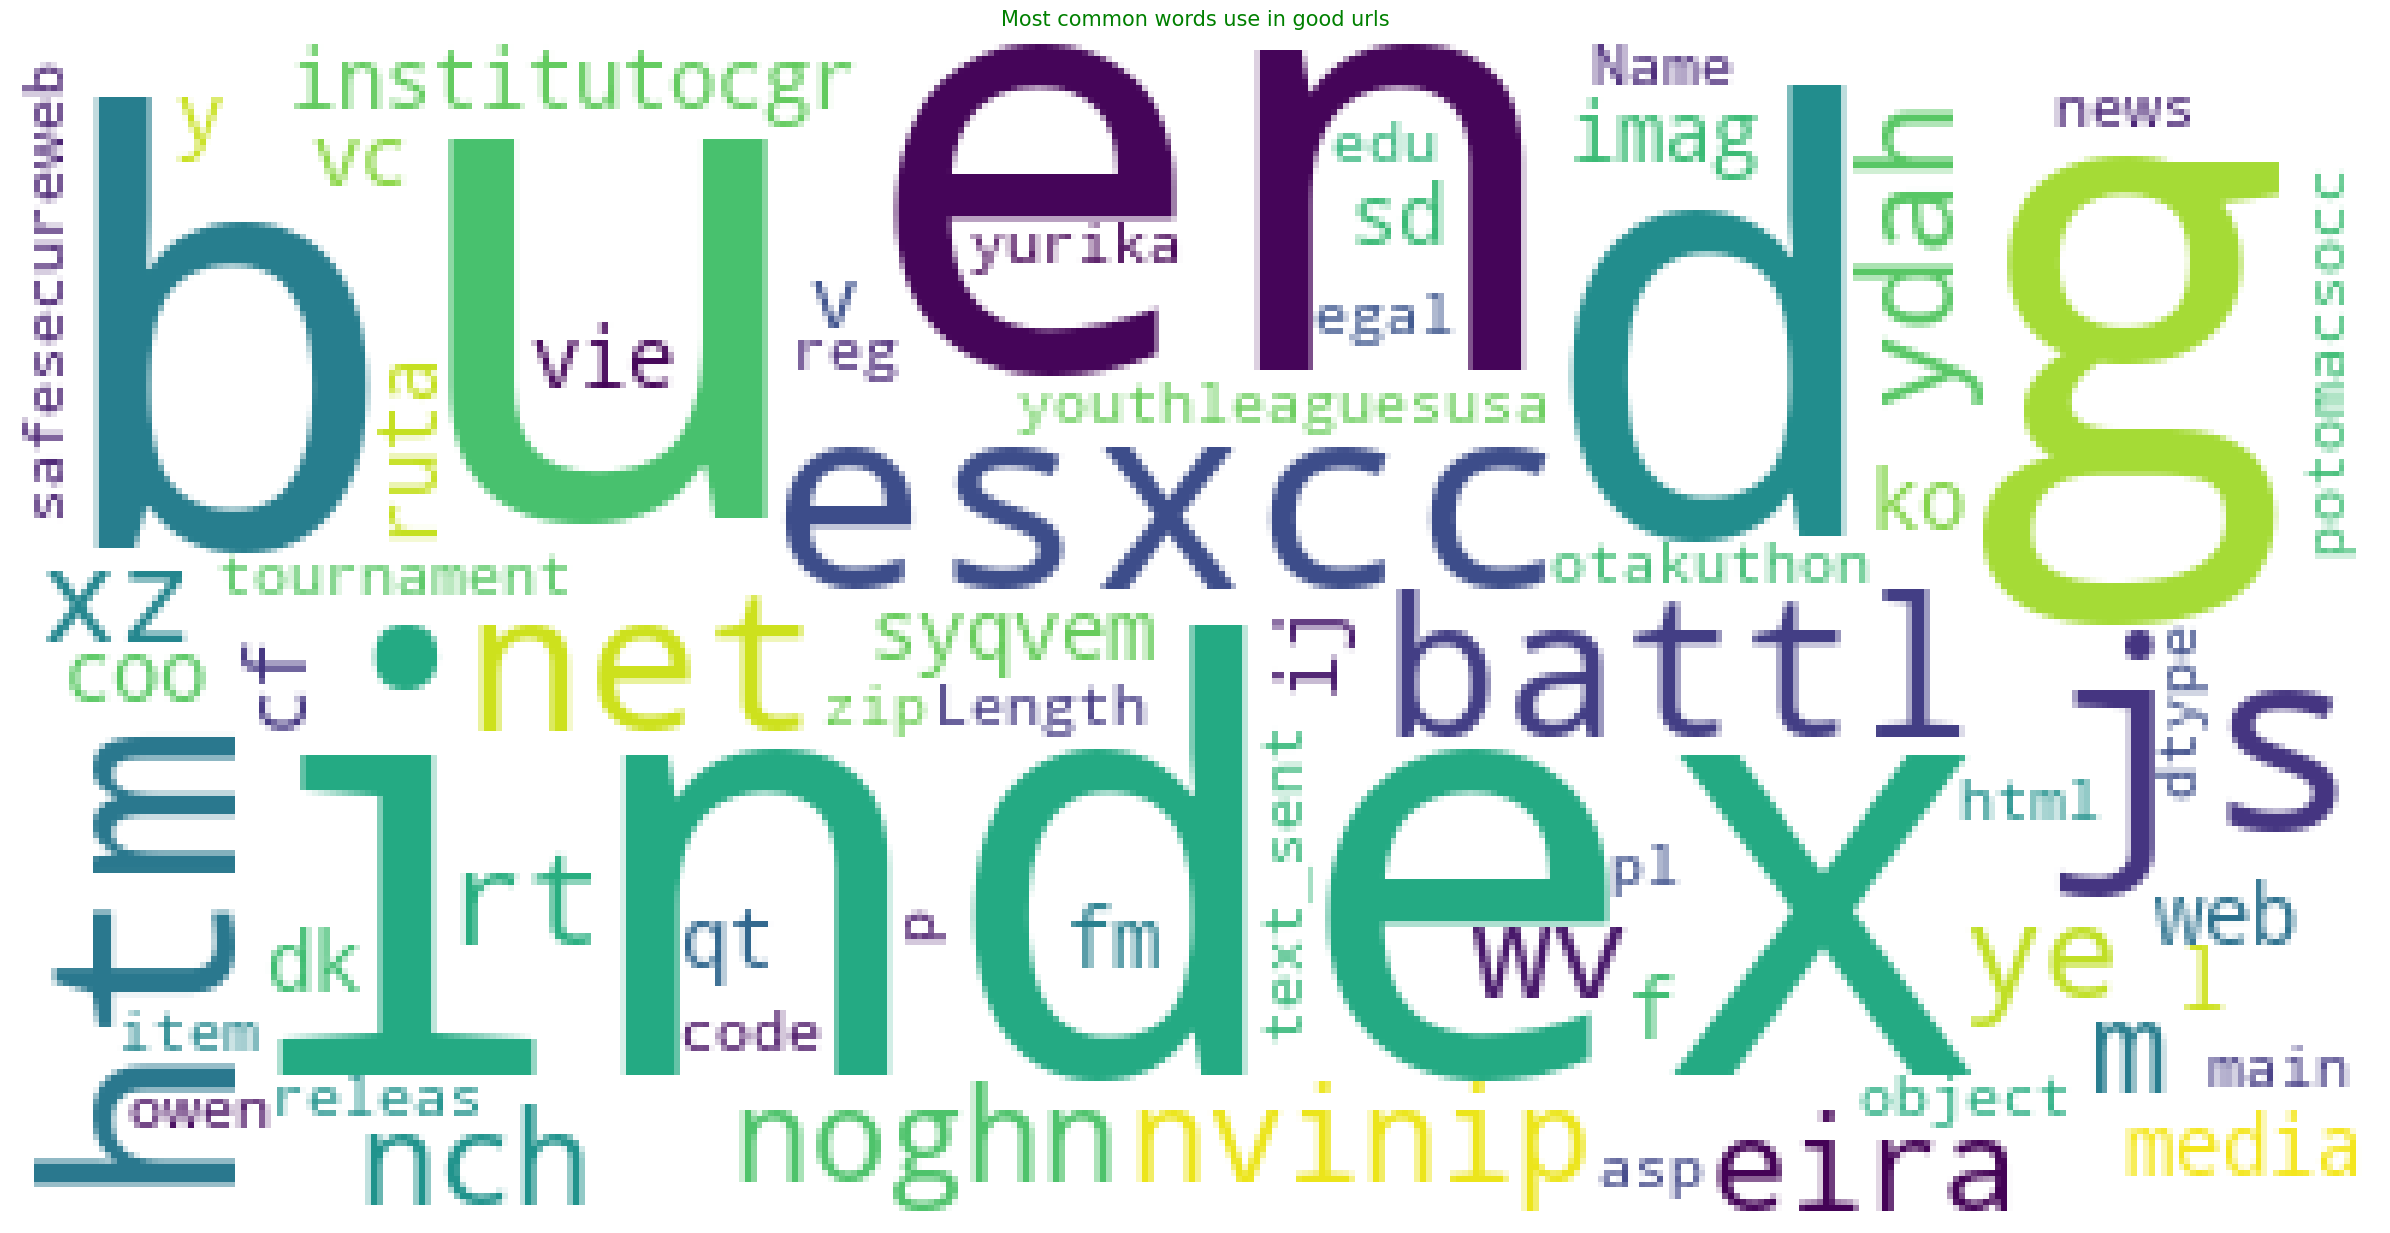

In [189]:
common_text = str(data)
plot_wordcloud(common_text, max_words=400, max_font_size=120, 
               title = 'Most common words use in good urls', title_size=15)

In [190]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

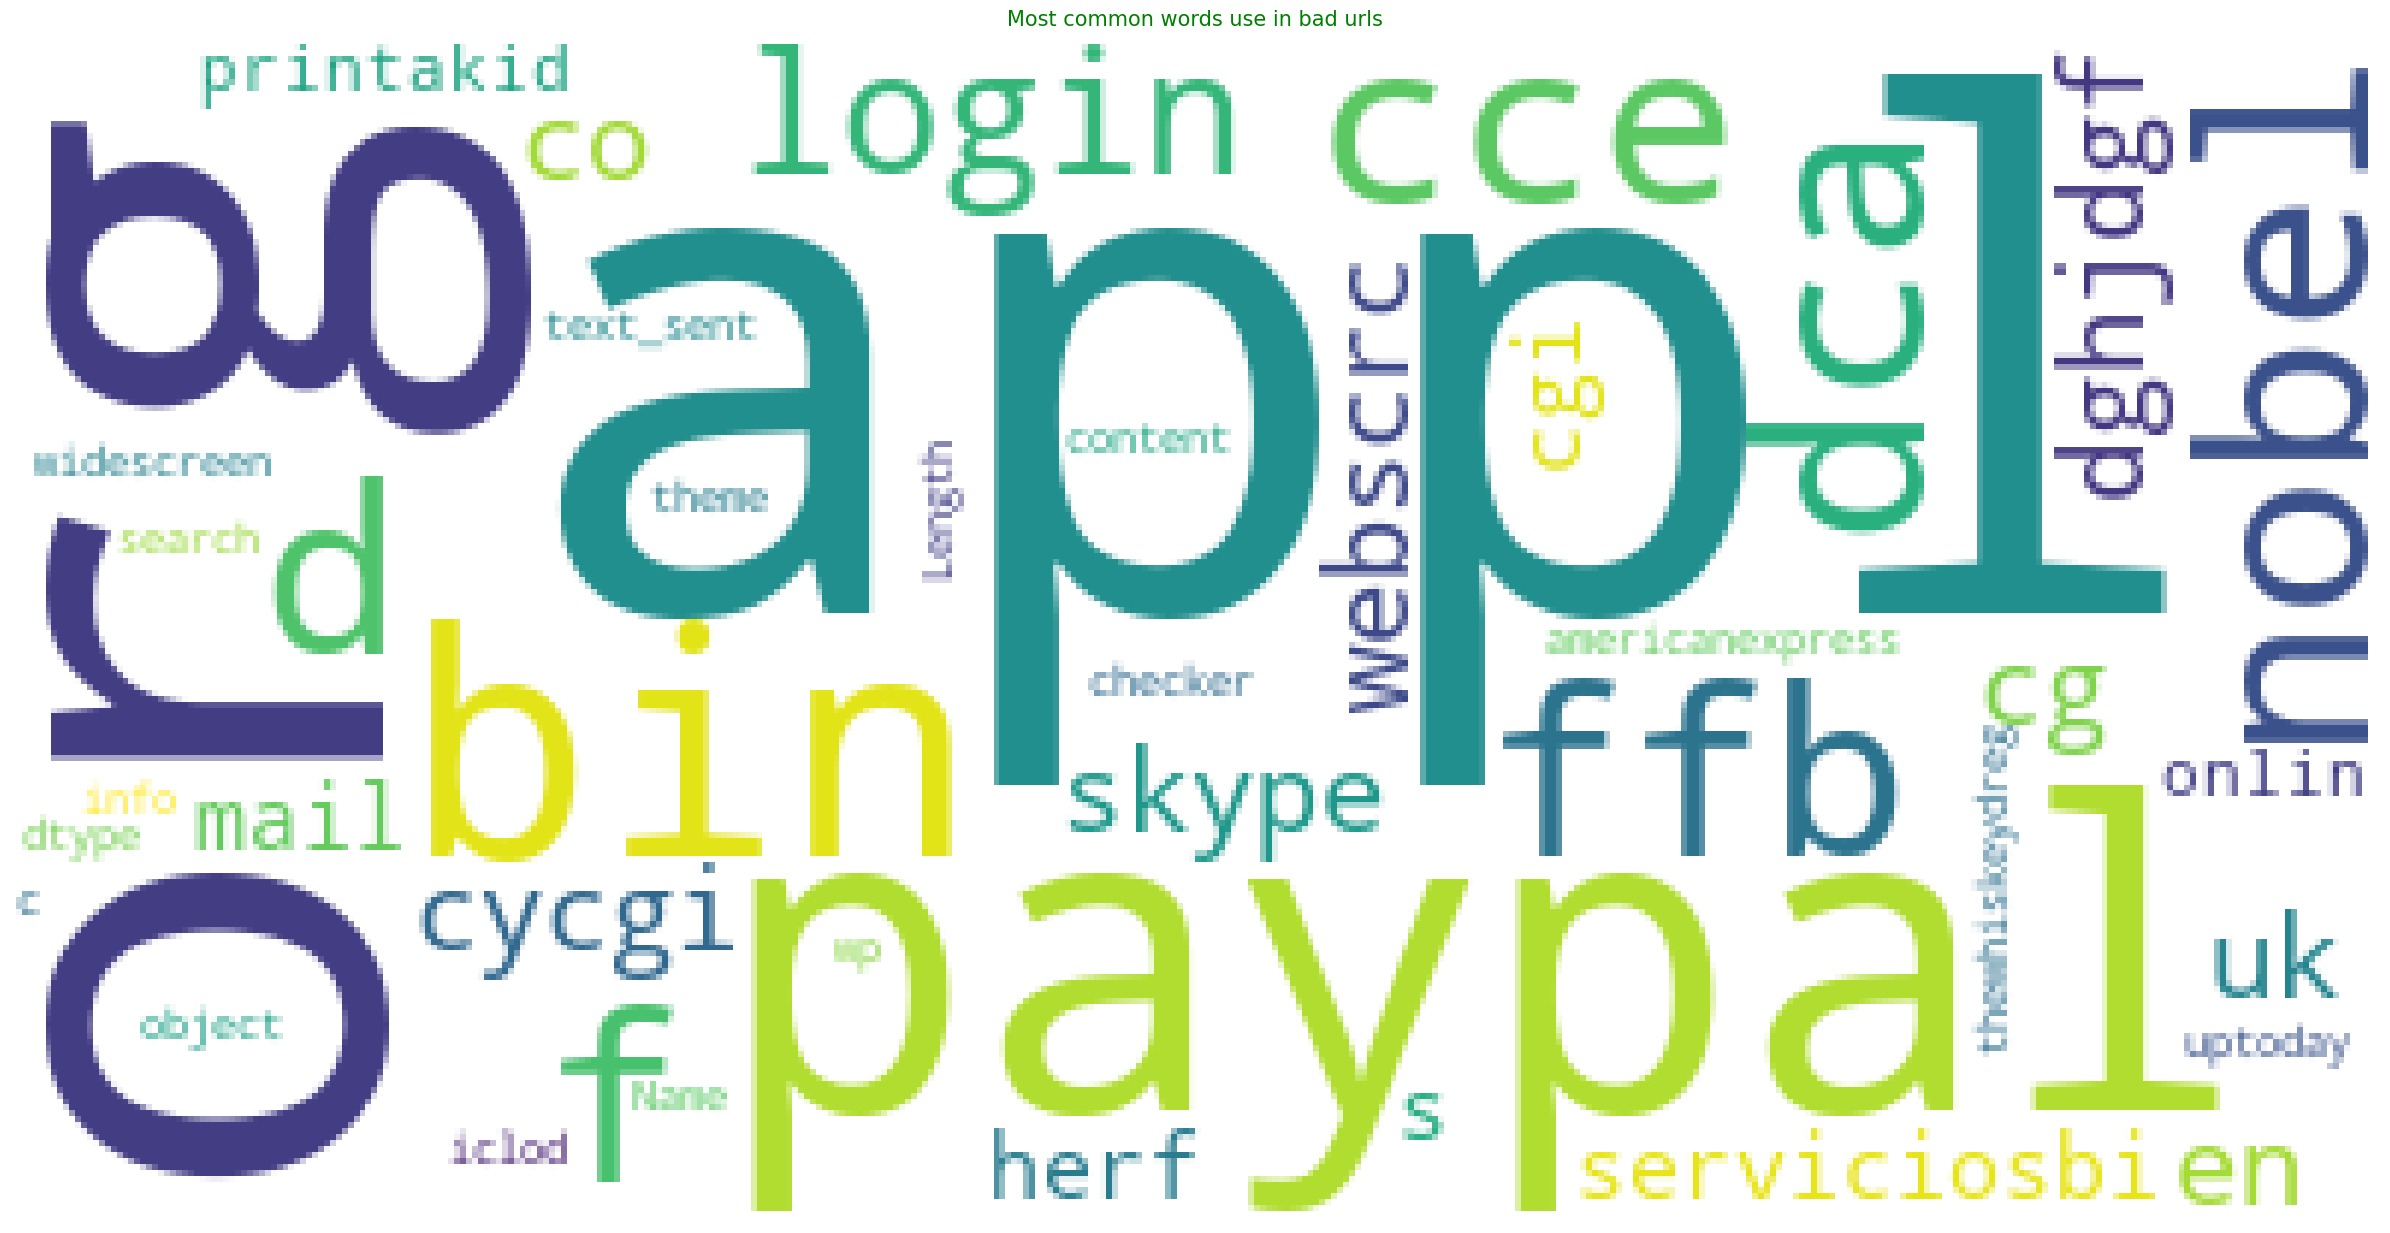

In [191]:
common_text = str(data)
plot_wordcloud(common_text, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

In [192]:
cv = CountVectorizer()

In [193]:
feature = cv.fit_transform(phish_data.text_sent)

In [194]:
feature_names = cv.get_feature_names_out()
print(feature_names)
feature[:5].toarray() 

['aa' 'aaa' 'aaaa' ... 'zzzyvasmusicroom' 'zzzz' 'zzzzzzz']


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Split the data 

In [195]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

### LogisticRegression


In [196]:
lr = LogisticRegression()

In [197]:
lr.fit(trainX,trainY)

LogisticRegression()

In [198]:
lr.score(testX,testY)

0.9641250054609795

Training Accuracy : 0.9785589289658336
Testing Accuracy : 0.9641250054609795

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.90      0.97      0.94     36641
        Good       0.99      0.96      0.98    100697

    accuracy                           0.96    137338
   macro avg       0.95      0.97      0.96    137338
weighted avg       0.97      0.96      0.96    137338


CONFUSION MATRIX


<Axes: >

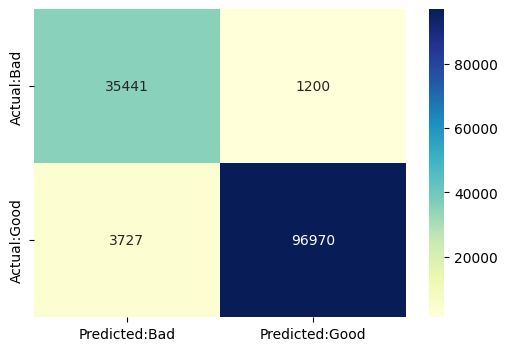

In [199]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [200]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [201]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [202]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [203]:
pipeline_ls.score(testX,testY) 

0.9664040542311669

Training Accuracy : 0.9807360447364525
Testing Accuracy : 0.9664040542311669

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36989
        Good       0.99      0.97      0.98    100349

    accuracy                           0.97    137338
   macro avg       0.95      0.97      0.96    137338
weighted avg       0.97      0.97      0.97    137338


CONFUSION MATRIX


<Axes: >

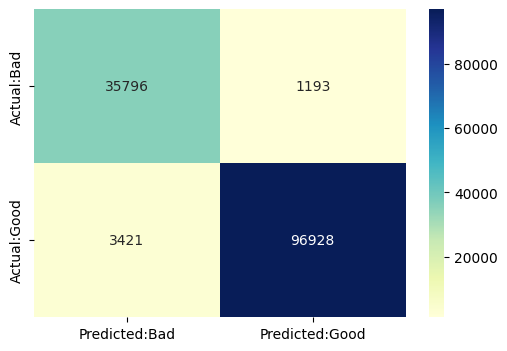

In [204]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [205]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [206]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9664040542311669


In [207]:
predict_bad = ['http://google.com-redirect@valimail.com','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']


In [208]:
predict = ['https://www.geeksforgeeks.org/python-program-to-convert-a-list-to-string/']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.predict(predict)
print(result)


['good']
